# PROJETO MÓDULO I - Data Science Aplicada

***

## Python e pandas para análise de dados reais


    O projeto do módulo I do Bootcamp Data Science aplicada promovida pela Alura consiste em analisar dados da saúde disponíveis no DATASUS (departamento de informática do Sistema Único de Saúde do Brasil.) 
    
    A temática de análise (escolha pessoal) será o dataset de casos diagnosticados de AIDS (seção: Epidemiológicas e Morbidade) - Casos de AIDS notificados no SINAN, declarados no SIM e registrados no SISCEL/SICLOM por ano de diagnóstico

													
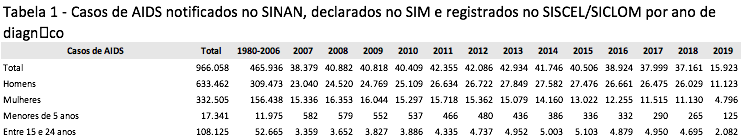

## Lógica de análise

**1.** Os dados analisados se referem a soma de casos diagnosticados no SINAN, declarados no SIM e registrados no SISCEL/SICLOM por ano de diagnóstico.

**2.** O objetivo I é analisar o comportamento da epidemia desde o primeiro caso diagnosticado no Brasil até o ano de 2019


***

**SIGNIFICADO DE SIGLAS E ACRÔNIMOS**

**1.** DATASUS: departamento de informática do Sistema Único de Saúde do Brasil.

**2.** SINAN: Sistema de Informação de Agravos de Notificação

**3.** SIM: Sistema de Informação sobre Mortalidade 

**4.** SISCEL: Sistema de Controle de Exames Laboratoriais de CD4+/CD8+ e Carga Viral do HIV

**5.** Sistema de Controle Logístico de Medicamentos

***

**REFERÊNCIAS**

**1.** Dataset utilizado: <a href="https://datasus.saude.gov.br/acesso-a-informacao/casos-de-aids-desde-1980-sinan/"> DATASUS </a>

**2.** Programa das Nações Unidas focado em ajudar nações no combate à AIDS: <a href="https://unaids.org.br/"> UNAIDS </a>

**3.** História de AIDS no Brasil: <a href="http://www.aids.gov.br/pt-br/centrais-de-conteudos/historia-aids-linha-do-tempo"> AIDS.GOV </a>



# ANÁLISE - CASOS DA AIDS DIAGNOSTICADOS NO BRASIL

## Importação das Bibliotecas

In [304]:
import pandas            as pd
import seaborn           as sns
import numpy             as np

import matplotlib
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

## Cronologia

Abaixo consta a cronologia da doença desde os primeiros casos em 1977 até 2017.

As informações foram retiradas do site AIDS.GOV e não há registros de 1992 à 2012.
Nota-se fortes ações do Estado como de ONG's e organizações mundiais para conter a doença, o que foi primordial para a redução de contaminações do vírus HIV e o desenvolvimento da AIDS.

<img src="https://i.ibb.co/GTw8F7y/Data-Science.jpg" alt="Data-Science" width="1132" height="882" data-load="full" style="">

## Análise dos Dados

In [2]:
# importação do dataset
df = pd.read_csv('HIV-AIDS.csv',thousands = '.')
df

,Fx. Etária(SINAN),1980,1982,1983,1984,1985,1986,1987,1988,1989,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,Total
0,< 1 ano,0,2,0,4,6,1,29,60,63,...,280,228,207,192,176,148,147,127,59,7944
1,1-4,0,0,0,3,3,8,21,41,56,...,217,282,260,216,186,203,180,157,68,9940
2,5-9,0,0,0,1,5,6,12,16,25,...,164,123,122,117,95,77,77,76,43,5242
3,10-14,0,1,0,3,6,9,21,27,39,...,192,161,145,112,90,80,76,68,32,3500
4,15-19,0,0,1,6,27,49,127,209,245,...,804,895,983,1033,1025,970,899,794,323,19934
5,20-34,1,10,26,64,259,588,1481,2411,3355,...,16837,16964,17408,16842,16381,15544,15677,15016,6706,422557
6,35-49,0,2,12,42,188,379,820,1291,1807,...,17223,16594,16498,15959,15236,14659,13810,13760,5800,370308
7,50-64,0,2,2,7,32,70,155,241,366,...,5812,5988,6309,6325,6295,6206,6040,6020,2469,110204
8,65-79,0,0,0,1,2,2,25,37,43,...,775,791,940,881,962,967,1019,1061,396,15305
9,80 e mais,0,0,0,1,0,0,2,1,3,...,51,59,62,69,60,70,74,82,27,926


In [3]:
# conferindo manualmente se os valores estão corretos (conforme dados no site do SINAN)
print(df.T[28:29].sum().sum())
print(df.T[30:31].sum().sum())

40882.0
40409.0


In [4]:
#Renomeando a coluna para facilitar as análises
df.rename(columns={'Fx. Etária(SINAN)' : 'fx_idade'}, inplace = True)
df.head(2)

,fx_idade,1980,1982,1983,1984,1985,1986,1987,1988,1989,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,Total
0,< 1 ano,0,2,0,4,6,1,29,60,63,...,280,228,207,192,176,148,147,127,59,7944
1,1-4,0,0,0,3,3,8,21,41,56,...,217,282,260,216,186,203,180,157,68,9940


### VISUALIZAÇÃO

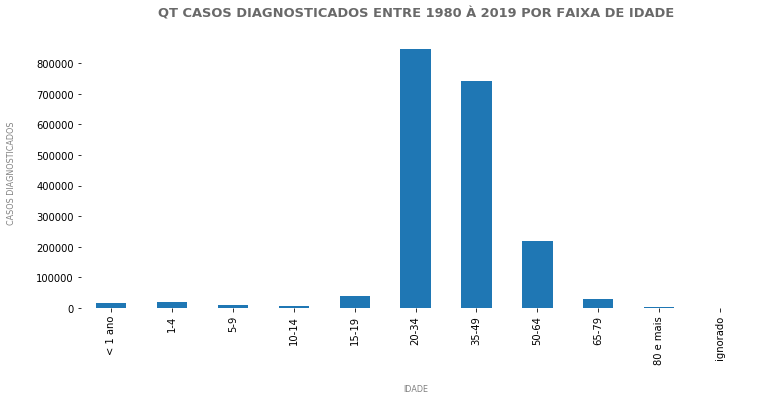

In [5]:

s2 = df.set_index('fx_idade').T.sum().plot(kind = 'bar', figsize=(12, 5))

s2 = plt.title('QT CASOS DIAGNOSTICADOS ENTRE 1980 À 2019 POR FAIXA DE IDADE',
               pad = 20,
         fontsize = 13, color ='dimgrey', fontweight = 'bold')

#s2.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.2f}'))

s2 = sns.despine(bottom = True, left=True)
s2 = plt.xlabel('IDADE', color = 'grey', labelpad = 20, fontsize = 8)
s2 = plt.ylabel('CASOS DIAGNOSTICADOS', color = 'grey', labelpad = 20, fontsize = 8)


Jovens entre 20 - 34 anos foram o grupo com maior casos diagnosticados, seguido pelo grupo de de 35 à 49 anos.
As idades entre 20 - 49 anos são as que concentram maior quantidade de casos de AIDS

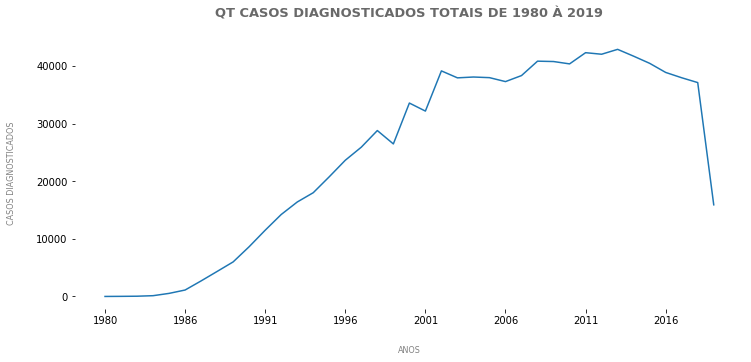

In [6]:

df.drop(['fx_idade', 'Total'], axis = 1).sum().plot(figsize=(12,5))

s2 = plt.title('QT CASOS DIAGNOSTICADOS TOTAIS DE 1980 À 2019',
               pad = 20,
         fontsize = 13, color ='dimgrey', fontweight = 'bold')

s2 = sns.despine(bottom = True, left=True)
s2 = plt.xlabel('ANOS', color = 'grey', labelpad = 20, fontsize = 8)
s2 = plt.ylabel('CASOS DIAGNOSTICADOS', color = 'grey', labelpad = 20, fontsize = 8)


Os anos 2000 até meados de 2012 concentram o pico da doença, com forte queda a partir de 2016

### CASOS CONFIRMADOS EM CRIANÇAS (BEBES)

Conforme linha do tempo, somente em 1985 foi identificado o primeiro caso de transmissão vertical.
Será analisado os dois primeiros grupos: < 1 ano e 1 - 4 anos (possível caso de identificação tardia)

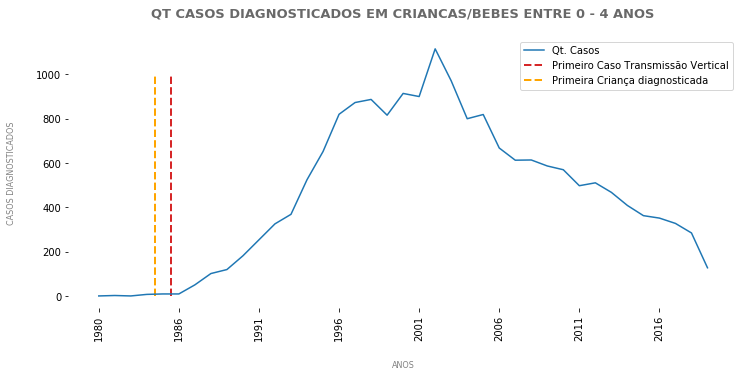

In [176]:
bebes = df[0:2].T[:-1].T.sum()


bebes[1:].plot(figsize=(12,5), label = 'Qt. Casos')
s2 = plt.title('QT CASOS DIAGNOSTICADOS EM CRIANCAS/BEBES ENTRE 0 - 4 ANOS',
               pad = 20,
         fontsize = 13, color ='dimgrey', fontweight = 'bold')

s2 = sns.despine(bottom = True, left=True)
s2 = plt.xlabel('ANOS', color = 'grey', labelpad = 20, fontsize = 8)
s2 = plt.ylabel('CASOS DIAGNOSTICADOS', color = 'grey', labelpad = 20, fontsize = 8)
plt.xticks(rotation=90)
s2 = plt.vlines(x=4.5, linewidth=2, color='#d62728', ymin=0, ymax=1000, linestyle='--', 
                label = 'Primeiro Caso Transmissão Vertical')
s2 = plt.vlines(x=3.5, linewidth=2, color='orange', ymin=0, ymax=1000, linestyle='--', 
                label = 'Primeira Criança diagnosticada')
plt.legend()
s2 = s2

O primeiro caso diagnosticado em crianças ocorreu em 1983 e a primeira transmissão vertical diagnosticada foi registrada após 2 anós, ou seja, em 1985. No Brasil, a quantidade de casos foi crescente, atingindo o pico entre 2002 e 2003 para então, nos anos subsequentes, registrar quedas.

### CASOS CONFIRMADOS EM CRIANÇAS (5 - 14 ANOS)

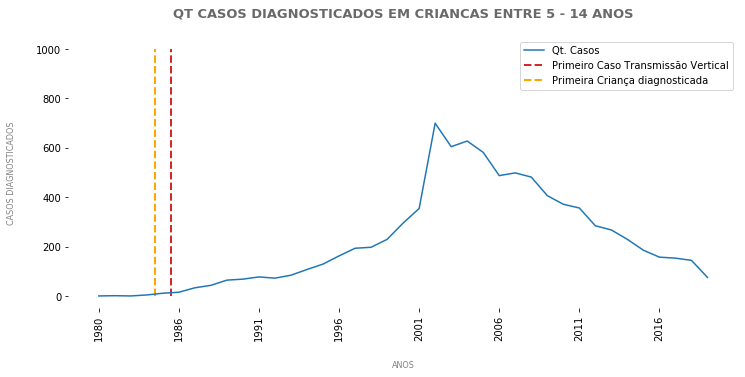

In [177]:
criancas = df[2:4].T[:-1].T.sum()


criancas[1:].plot(figsize=(12,5), label = 'Qt. Casos')
s2 = plt.title('QT CASOS DIAGNOSTICADOS EM CRIANCAS ENTRE 5 - 14 ANOS',
               pad = 20,
         fontsize = 13, color ='dimgrey', fontweight = 'bold')

s2 = sns.despine(bottom = True, left=True)
s2 = plt.xlabel('ANOS', color = 'grey', labelpad = 20, fontsize = 8)
s2 = plt.ylabel('CASOS DIAGNOSTICADOS', color = 'grey', labelpad = 20, fontsize = 8)
plt.xticks(rotation=90)
s2 = plt.vlines(x=4.5, linewidth=2, color='#d62728', ymin=0, ymax=1000, linestyle='--', 
                label = 'Primeiro Caso Transmissão Vertical')
s2 = plt.vlines(x=3.5, linewidth=2, color='orange', ymin=0, ymax=1000, linestyle='--', 
                label = 'Primeira Criança diagnosticada')
plt.legend()
s2 = s2

Considerando que os primeiros casos em crianças e de transmissão vertical ocorreram em 1983 e 1985, respectivamente, é notavel o pico em crianças e adolescentes de 5 - 14 anos com pico nos anos 2000, ou seja, 1985 + 14 anos = 1999


### ANALISE EM ADULTOS - 20 À 49 ANOS | 50 À 79 ANOS

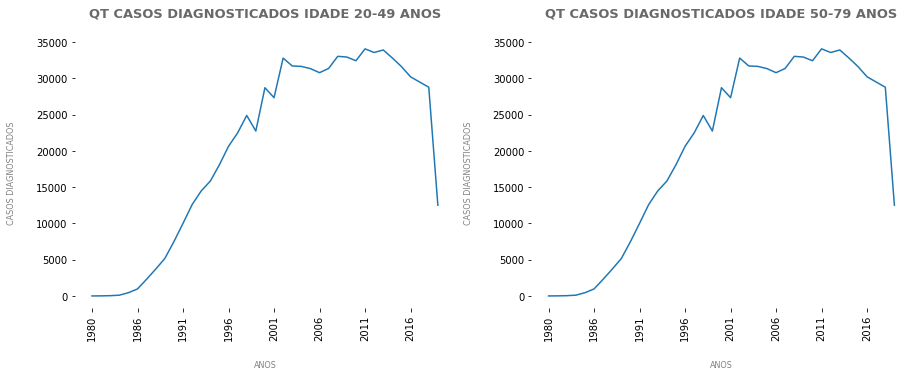

In [202]:
plt.subplot(1,2,1)

adultos = df[5:7].T[:-1].T.sum()


adultos[1:].plot(figsize=(15,5), label = 'Qt. Casos')
s2 = plt.title('QT CASOS DIAGNOSTICADOS IDADE 20-49 ANOS',
               pad = 20,
         fontsize = 13, color ='dimgrey', fontweight = 'bold')

s2 = sns.despine(bottom = True, left=True)
s2 = plt.xlabel('ANOS', color = 'grey', labelpad = 20, fontsize = 8)
s2 = plt.ylabel('CASOS DIAGNOSTICADOS', color = 'grey', labelpad = 20, fontsize = 8)
plt.xticks(rotation=90)
s2 = s2


###### 

plt.subplot(1,2,2)

idosos = df[7:9].T[:-1].T.sum()

adultos[1:].plot(figsize=(15,5), label = 'Qt. Casos')
s2 = plt.title('QT CASOS DIAGNOSTICADOS IDADE 50-79 ANOS',
               pad = 20,
         fontsize = 13, color ='dimgrey', fontweight = 'bold')

s2 = sns.despine(bottom = True, left=True)
s2 = plt.xlabel('ANOS', color = 'grey', labelpad = 20, fontsize = 8)
s2 = plt.ylabel('CASOS DIAGNOSTICADOS', color = 'grey', labelpad = 20, fontsize = 8)
plt.xticks(rotation=90)

s2 = s2

Nota-se que o comportamento de diagnósticos entre jovens e adultos de 20 à 49 anos e dos adultos mais velhos e idosos, de 50 à 79 anos é bastante similar, quase idêntico.

### Diagnósticos em adultos e idosos - Ações do Estado após 2010

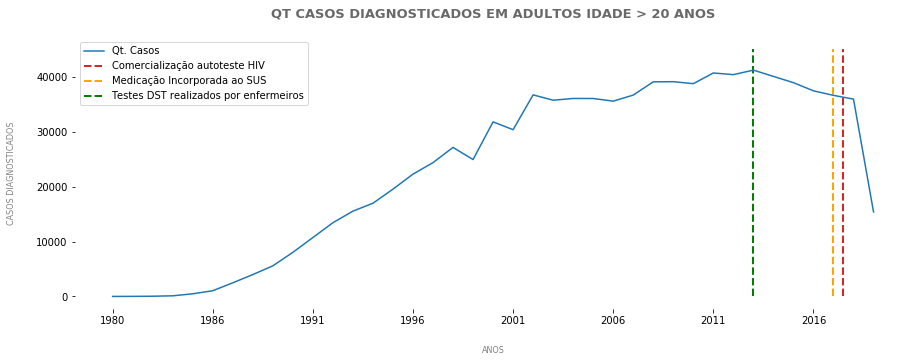

In [227]:
adultos = df[5:-1].T[:-1].T.sum()


adultos[1:].plot(figsize=(15,5), label = 'Qt. Casos')

s2 = plt.title('QT CASOS DIAGNOSTICADOS EM ADULTOS IDADE > 20 ANOS',
               pad = 20,
         fontsize = 13, color ='dimgrey', fontweight = 'bold')

s2 = sns.despine(bottom = True, left=True)
s2 = plt.xlabel('ANOS', color = 'grey', labelpad = 20, fontsize = 8)
s2 = plt.ylabel('CASOS DIAGNOSTICADOS', color = 'grey', labelpad = 20, fontsize = 8)

s2 = plt.vlines(x=36.5, linewidth=2, color='#d62728', ymin=0, ymax=45000, linestyle='--', 
                label = 'Comercialização autoteste HIV')
s2 = plt.vlines(x=36, linewidth=2, color='orange', ymin=0, ymax=45000, linestyle='--', 
                label = 'Medicação Incorporada ao SUS')

s2 = plt.vlines(x=32, linewidth=2, color='green', ymin=0, ymax=45000, linestyle='--', 
                label = 'Testes DST realizados por enfermeiros')

plt.legend(loc=2)

s2 = s2

## Total - Diagnósticos x Ações do Estado

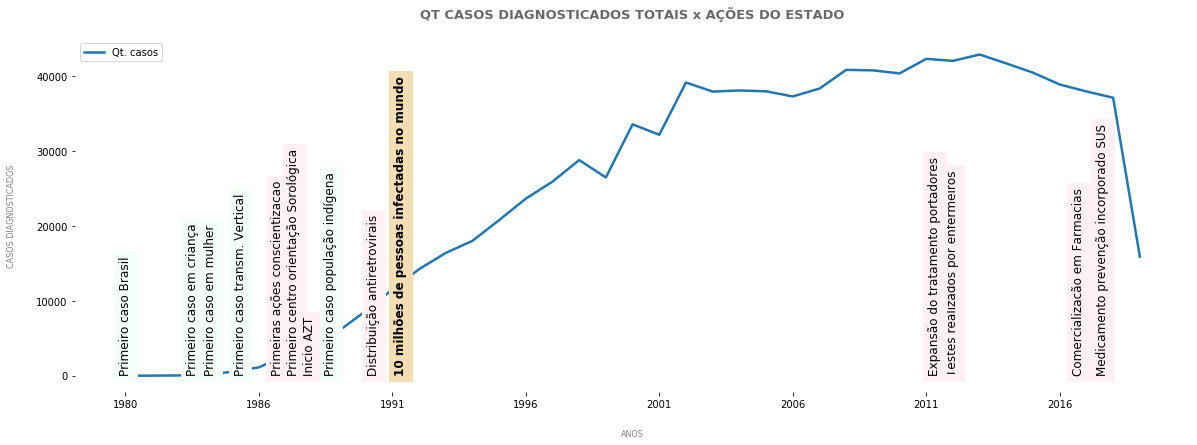

In [722]:
fig, ax = plt.subplots()


ax = df.drop(['fx_idade', 'Total'], axis = 1).sum().plot(figsize=(20,6.5),
                                                        label = 'Qt. casos', lw = 2.5)

s2 = plt.title('QT CASOS DIAGNOSTICADOS TOTAIS x AÇÕES DO ESTADO',
               pad = 20,
         fontsize = 13, color ='dimgrey', fontweight = 'bold')



s2 = sns.despine(bottom = True, left=True)
s2 = plt.xlabel('ANOS', color = 'grey', labelpad = 20, fontsize = 8,)
s2 = plt.ylabel('CASOS DIAGNOSTICADOS', color = 'grey', labelpad = 20, fontsize = 8)



ax.annotate('Primeiro caso Brasil', xy=(-1.80, 0.9), xytext=(0.01, 100),
           horizontalalignment='center',
           verticalalignment='bottom',
           rotation = 'vertical', backgroundcolor = 'mintcream', size = 12) # Primeiro caso BR
    
    
ax.annotate('Primeiro caso em criança', xy=(2, 2), xytext=(2.5, 1),
           horizontalalignment='center',
           verticalalignment='bottom',
           rotation = 'vertical',  backgroundcolor = 'mintcream', size = 12) # Primeiro caso crianca    

ax.annotate('Primeiro caso em mulher', xy=(2, 2), xytext=(3.2, 1),
           horizontalalignment='center',
           verticalalignment='bottom',
           rotation = 'vertical', backgroundcolor = 'mintcream', size = 12) # Primeiro caso feminino    

ax.annotate('Primeiro caso transm. Vertical', xy=(2, 2), xytext=(4.3, 1),
           horizontalalignment='center',
           verticalalignment='bottom',
           rotation = 'vertical', backgroundcolor = 'mintcream', size = 12)    


ax.annotate('Primeiras ações conscientizacao', xy=(2, 2), xytext=(5.7, 1),
           horizontalalignment='center',
           verticalalignment='bottom',
           rotation = 'vertical', backgroundcolor = 'lavenderblush', size = 12)    

ax.annotate('Primeiro centro orientação Sorológica', xy=(2, 2), xytext=(6.3, 1),
           horizontalalignment='center',
           verticalalignment='bottom',
           rotation = 'vertical', backgroundcolor = 'lavenderblush', size = 12) 

ax.annotate('Inicio AZT', xy=(2, 2), xytext=(6.9, 1),
           horizontalalignment='center',
           verticalalignment='bottom',
           rotation = 'vertical', backgroundcolor = 'lavenderblush', size = 12) 

ax.annotate('Primeiro caso população indígena', xy=(2, 2), xytext=(7.7, 1),
           horizontalalignment='center',
           verticalalignment='bottom',
           rotation = 'vertical', backgroundcolor = 'mintcream', size = 12)    


ax.annotate('10 milhões de pessoas infectadas no mundo', weight = 'bold', xy=(2, 2), xytext=(10.3, 1),
           horizontalalignment='center',
           verticalalignment='bottom',
           rotation = 'vertical', backgroundcolor = 'wheat', size = 12)    


ax.annotate('Distribuição antiretrovirais', xy=(2, 2), xytext=(9.3, 1),
           horizontalalignment='center',
           verticalalignment='bottom',
           rotation = 'vertical', backgroundcolor = 'lavenderblush', size = 12)    


ax.annotate('Testes realizados por enfermeiros', xy=(2, 2), xytext=(31, 1),
           horizontalalignment='center',
           verticalalignment='bottom',
           rotation = 'vertical', backgroundcolor = 'lavenderblush', size = 12)    


ax.annotate('Expansão do tratamento portadores', xy=(2, 2), xytext=(30.3, 1),
           horizontalalignment='center',
           verticalalignment='bottom',
           rotation = 'vertical', backgroundcolor = 'lavenderblush', size = 12)    

ax.annotate('Comercializacão em Farmacias', xy=(2, 2), xytext=(35.7, 1),
           horizontalalignment='center',
           verticalalignment='bottom',
           rotation = 'vertical', backgroundcolor = 'lavenderblush', size = 12)    

ax.annotate('Medicamento prevenção incorporado SUS', xy=(2, 2), xytext=(36.6, 1),
           horizontalalignment='center',
           verticalalignment='bottom',
           rotation = 'vertical', backgroundcolor = 'lavenderblush', size = 12)    



plt.legend(loc=2)
s2 = s2

